In [1]:
import numpy as np
import cv2
import matplotlib.pylab as plt

In [2]:
a = [ [1,2,3],
      [4,5,6]]
print(a)
print(a[1][2]) # a[1][2] = 6
print(a[1])

[[1, 2, 3], [4, 5, 6]]
6
[4, 5, 6]


일반 리스트로 2차원 행렬을 표현합니다.

In [3]:
b = np.array([[1,2,3],
       [4,5,6]])
print(b)
print(b[1][2])   # 6
print(b[1,2])    # 6

[[1 2 3]
 [4 5 6]]
6
6


Numpy 배열로 2차원 행렬을 표현합니다. 더 빠르고 효율적입니다.

In [4]:
print(b.shape)         # (2, 3)
print(b.shape[0], b.shape[1]) # 2 3
d = (10, 30)
print(d[0])            # 10

(2, 3)
2 3
10


Shape은 행렬의 크기를 리턴해준다. 2by3행렬임을 알 수 있다.

튜플은 read only인 리스트 형태이다.

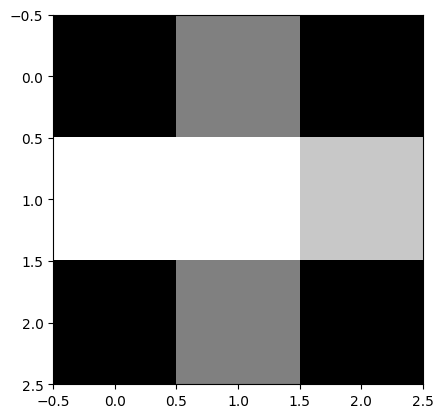

In [5]:
gray = np.array([[0,128,0],
                [255,255,200],
                 [0,128,0]] )
plt.imshow(gray, cmap='gray')

cmap='gray'로 그레이스케일 영상 표시.
그레이스케일 할때에는 반드시 cmap(colorMap)을 'gray'로 설정해 주어야 한다.

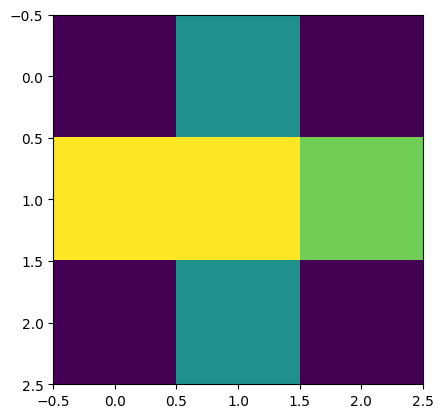

In [6]:
plt.imshow(gray)

컬러맵 없이 출력하면 색상으로 표시됨.

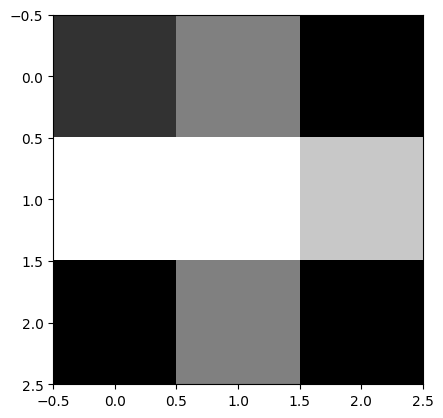

In [7]:
gray[0,0] = 50
plt.imshow(gray, cmap='gray')

특정 픽셀값을 변경하여 밝기 차이를 확인.

[[128 128 128]
 [128 128 128]
 [128 128 128]]


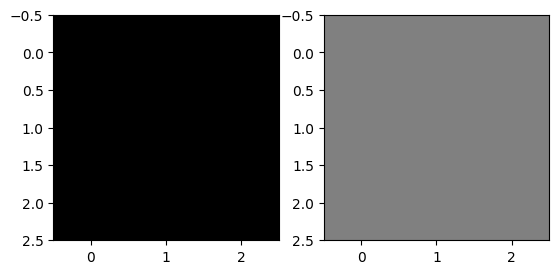

In [8]:
gray[:, :] = 128
print(gray)
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)

: 클론은 모든행과 모든 컬럼을 뜻하며, [:,:]=128은 모든값을 128로 바꾸라는 뜻이다.
subplot은 한 창에 모든 이미지를 출력하고자 할 때 사용한다.

첫번째 이미지가 검은 이유는, 128한가지 색밖에 없기때문에 그냥 다 어두운 색으로 표시한다.
이를 잘 나오게 하기 위해서는 vmin과 vmax를 사용한다. 가장 작은값은0, 가장 큰 값은 255로 한다.

In [9]:
color = np.zeros((2,4,3))
print(color.shape) # (2, 4, 3)

(2, 4, 3)


2x4 크기의 3채널(컬러) 배열 생성.

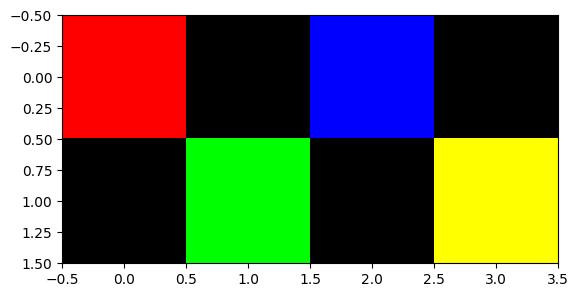

In [10]:
color[0,0] = [255,0,0] # 빨강
color[1,1] = [0,255,0] # 초록
color[0,2] = [0,0,255] # 파랑
color[1,3] = [255,255,0] # 노랑
plt.imshow(color)

각 좌표에 색상값 지정, RGB로 출력.

[[255.   0.   0.   0.]
 [  0.   0.   0. 255.]]


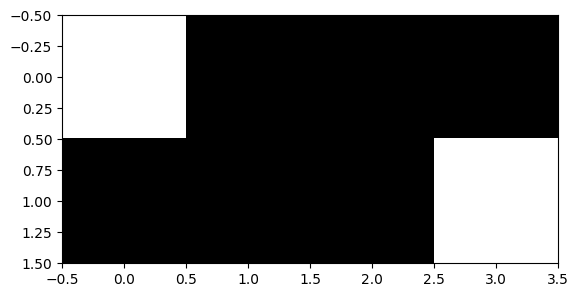

In [11]:
R = color[:,:,0]
print(R)
plt.imshow(R, cmap='gray')

빨간색 채널만 추출해서 밝기값으로 출력.

int64


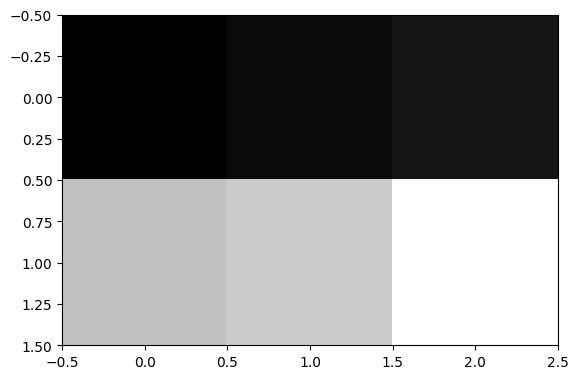

In [12]:
a = np.array([[10,20,30],
              [200,210,260]  ])
print(a.dtype)
plt.imshow(a, cmap='gray')

기본적으로 int32이지만 진짜 32bit처럼 입력하면 에러가 뜰 위험이있다.

uint8


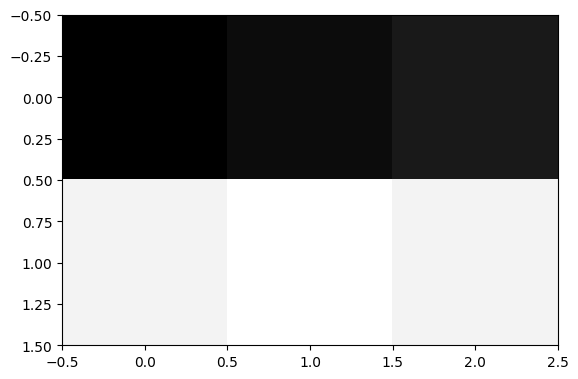

In [13]:
a = np.array([[10,20,30],
              [200,210,200]  ], dtype='uint8')
print(a.dtype)
plt.imshow(a, cmap='gray')

그래서 명시적으로 dateType을 uint8로 해줌으로써 Max값을 255로 설정해줘야 안전하다.

float64
[[0.03921569 0.07843137 0.11764706]
 [0.78431373 0.82352941 0.78431373]]


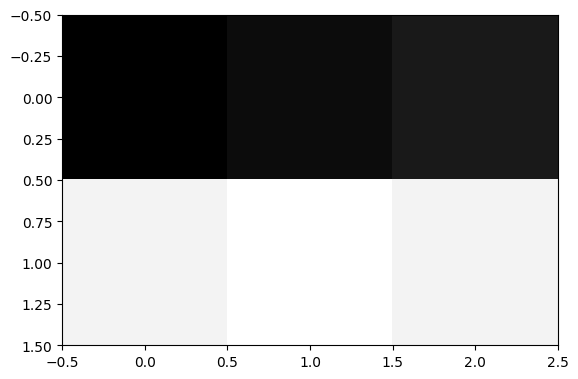

In [14]:
a = np.array([[10.0,20,30],
              [200,210,200]  ]) / 255
print(a.dtype)
print(a)
plt.imshow(a, cmap='gray')

모든원소중 하나라도 실수이면 플롯형태가 된다. 255라고 해서 0~1사이의 형태로 정규화되어도 잘 출력이 된다.

실수형 데이터는 자동으로 0~1 사이로 정규화됨.

(1415, 2122, 3)


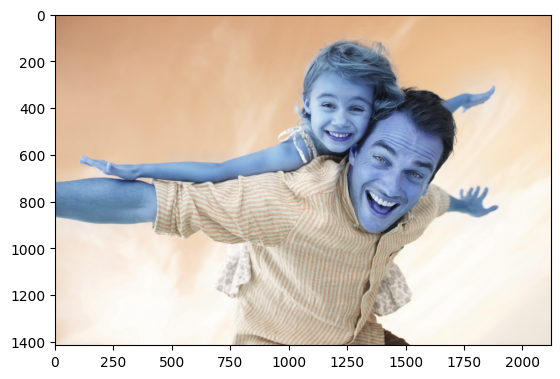

In [15]:
img = cv2.imread('/content/S_7.jpg')
plt.imshow(img)
print(img.shape)

OpenCV는 기본적으로 BGR로 되어있기 떄문에 다시 맞춰줄 필요가 있다.

In [16]:
print(img.shape)

(1415, 2122, 3)


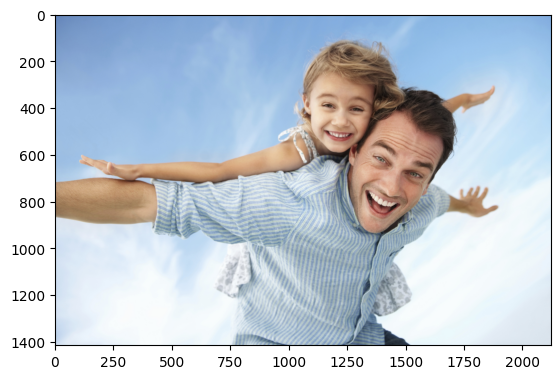

In [18]:
img2 = img.copy()
img2[:,:,0] = img[:,:,2]
img2[:,:,2] = img[:,:,0]
plt.imshow(img2)

BGR을 RGB로 변환하여 올바른 색상으로 출력.

(1415, 2122)


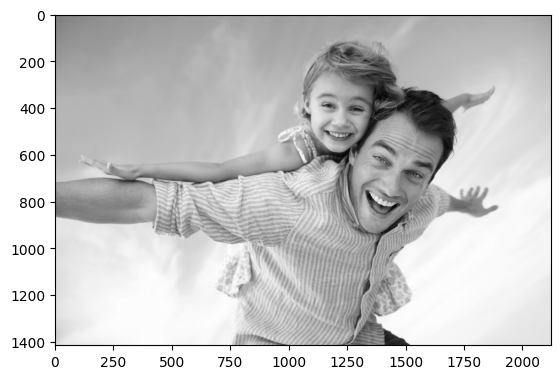

In [19]:
img = cv2.imread('/content/S_7.jpg', 0)
print(img.shape)
plt.imshow(img, cmap='gray')

OpenCV로 바로 그레이스케일 영상 읽기.

임의적으로 설정해 채널을 0채널로 만들 수 있다.



In [21]:
def imshow(tit, image) :
    plt.title(tit)
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

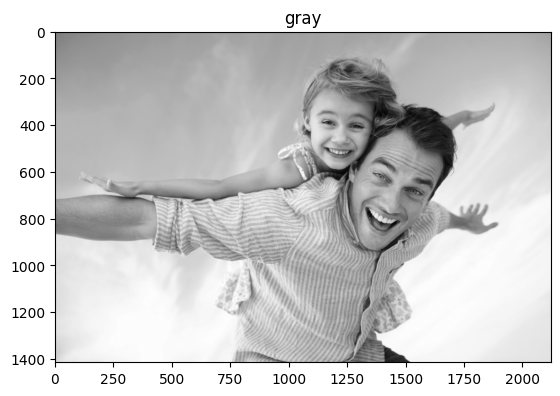

In [22]:
img = cv2.imread('/content/S_7.jpg', 0)
imshow("gray", img)

이미지 채널에 따라 자동 변환해주는 함수.

(1415, 2122, 3)
(1415, 2122, 3)


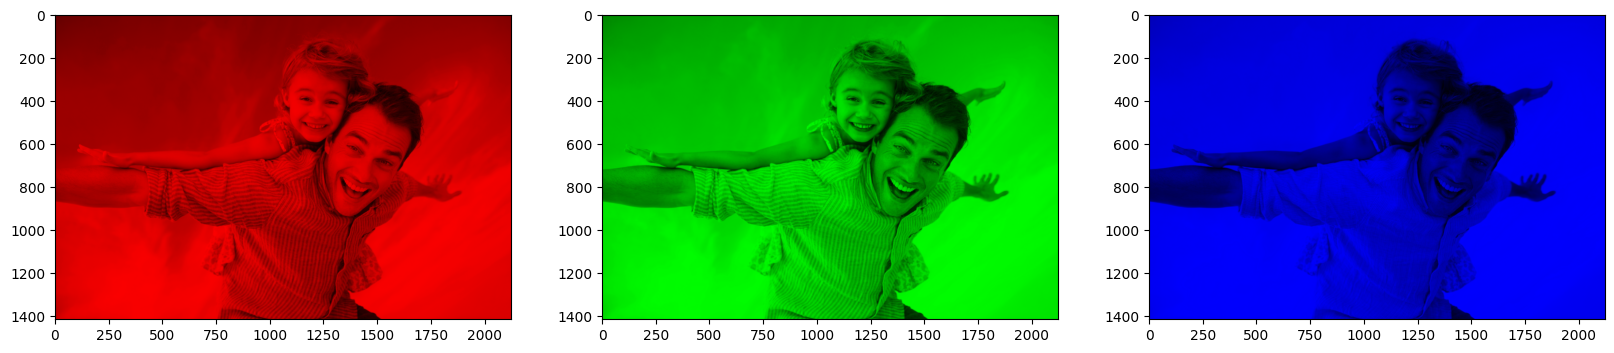

In [24]:
img = cv2.imread('/content/S_7.jpg')
print(img.shape)
R = np.zeros(img.shape, img.dtype)
G = np.zeros(img.shape, img.dtype)
B = np.zeros(img.shape, img.dtype)
print(R.shape)
R[:,:,0] = img[:,:,2]
G[:,:,1] = img[:,:,1]
B[:,:,2] = img[:,:,0]
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
plt.imshow(R)
plt.subplot(1,3,2)
plt.imshow(G)
plt.subplot(1,3,3)
plt.imshow(B)

이미지의 R, G, B 채널을 각각 분리하여 subplot으로 출력.

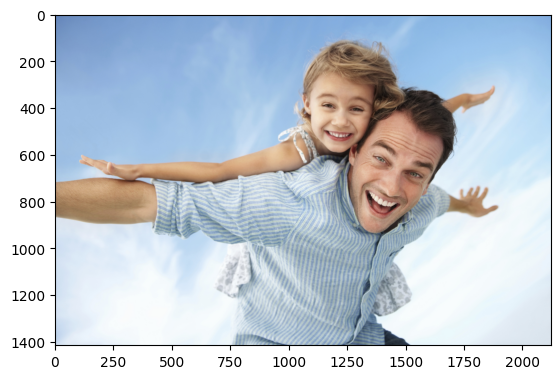

In [27]:
img = cv2.imread('/content/S_7.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

BGR을 RGB로 변환하여 올바른 색상으로 출력.

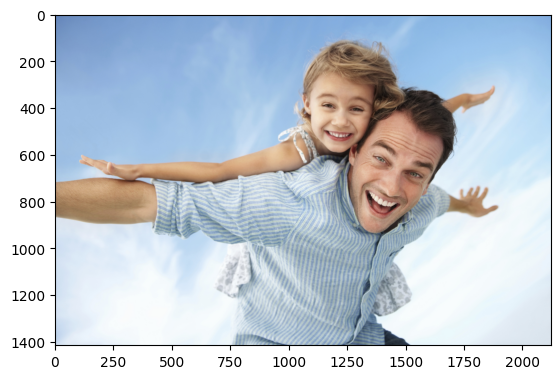

In [28]:
height, width, _ = img.shape

for h in range(0, height):
        for w in range(0, width):
            b = img[h, w, 0]
            g = img[h, w, 1]
            r = img[h, w, 2]

            if ( b > 50 and b < 70) and ( g > 150 and g < 200) and ( r > 30 and r < 60)   :
            #if ( g > 165 and g < 170 ) :
                img[h, w, :] = 0

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

굳이 채널까지 받을필요는 없으므로 under bar로 생략해줄 수 있다.
for문으로 모든 픽셀을 가져온다.
조건문의 해당색깔범위에 있으면 검정색으로 출력한다.